In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import symbols

In [43]:
def regula_falsi(func_expr, a, b, tol=1e-5, max_iter=100):
    x = sp.Symbol('x')
    f = sp.lambdify(x, func_expr, 'numpy')

    print(f"{'Iter':<5}{'a':>10}{'b':>10}{'c':>10}{'f(a)':>12}{'f(b)':>12}{'f(c)':>12}")
    for i in range(1, max_iter+1):
        fa = f(a)
        fb = f(b)
        if fa * fb >= 0:
            print("Regula Falsi tidak dapat digunakan karena f(a)*f(b) >= 0")
            return None

        c = b - (fb * (b - a)) / (fb - fa)
        fc = f(c)

        print(f"{i:<5}{a:>10.6f}{b:>10.6f}{c:>10.6f}{fa:>12.6f}{fb:>12.6f}{fc:>12.6f}")

        if abs(fc) < tol:
            print(f"\nAkar ditemukan: x = {c:.6f}")
            return c

        if fa * fc < 0:
            b = c
        else:
            a = c
    print("\nAkar tidak ditemukan dalam batas iterasi.")
    return None

In [44]:
def plot_function(func_expr, root=None, x_range=(-10, 10)):
    x = sp.Symbol('x')
    f = sp.lambdify(x, func_expr, 'numpy')

    x_vals = np.linspace(x_range[0], x_range[1], 400)
    try:
        y_vals = f(x_vals)
        if not np.all(np.isfinite(y_vals)):
            print("⚠️ Fungsi menghasilkan nilai tidak valid untuk plotting.")
            return
    except Exception as e:
        print("⚠️ Error saat mencoba mem-plot fungsi:", e)
        return

    plt.figure(figsize=(10,6))
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.plot(x_vals, y_vals, label=f'f(x) = {func_expr}')
    if root is not None:
        plt.plot(root, f(root), 'ro', label=f'Akar ≈ {root:.5f}')
    plt.title('Visualisasi Fungsi dan Akar (Metode Regula Falsi)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [45]:
print("""
📌 Format Fungsi:
- Pangkat       : x**2  (bukan x^2)
- Perkalian     : 3*x   (bukan 3x)
- Pembagian     : (1)/(x+1)
- Akar kuadrat  : sqrt(x) atau x**(1/2)
- Fungsi log    : log(x)   untuk ln(x)
- Fungsi e^x    : exp(x)
- Trigonometri  : sin(x), cos(x), tan(x)
- π dan e       : pi, E
Contoh benar:
    x**3 - x - 2
    sin(x) - x/2
    exp(-x) * cos(x)
    (x**2 + 2*x + 1)/(x - 1)
""")

persamaan = input("Masukkan fungsi f(x): ")
a = float(input("Masukkan nilai batas bawah (a): "))
b = float(input("Masukkan nilai batas atas (b): "))

x = symbols('x')

try:
    if '=' in persamaan:
        kiri, kanan = persamaan.split('=')
        fungsi_expr = parse_expr(kiri.strip()) - parse_expr(kanan.strip())
    else:
        fungsi_expr = parse_expr(persamaan)
except Exception as e:
    print("❌ Fungsi tidak valid. Pastikan format benar!")
    print("Detail:", e)
    raise SystemExit

print(f"\n✅ Fungsi berhasil dibaca: f(x) = {fungsi_expr}")


📌 Format Fungsi:
- Pangkat       : x**2  (bukan x^2)
- Perkalian     : 3*x   (bukan 3x)
- Pembagian     : (1)/(x+1)
- Akar kuadrat  : sqrt(x) atau x**(1/2)
- Fungsi log    : log(x)   untuk ln(x)
- Fungsi e^x    : exp(x)
- Trigonometri  : sin(x), cos(x), tan(x)
- π dan e       : pi, E
Contoh benar:
    x**3 - x - 2
    sin(x) - x/2
    exp(-x) * cos(x)
    (x**2 + 2*x + 1)/(x - 1)


✅ Fungsi berhasil dibaca: f(x) = 2*x - 4


Iter          a         b         c        f(a)        f(b)        f(c)
1    -10.000000 10.000000  2.000000  -24.000000   16.000000    0.000000

Akar ditemukan: x = 2.000000


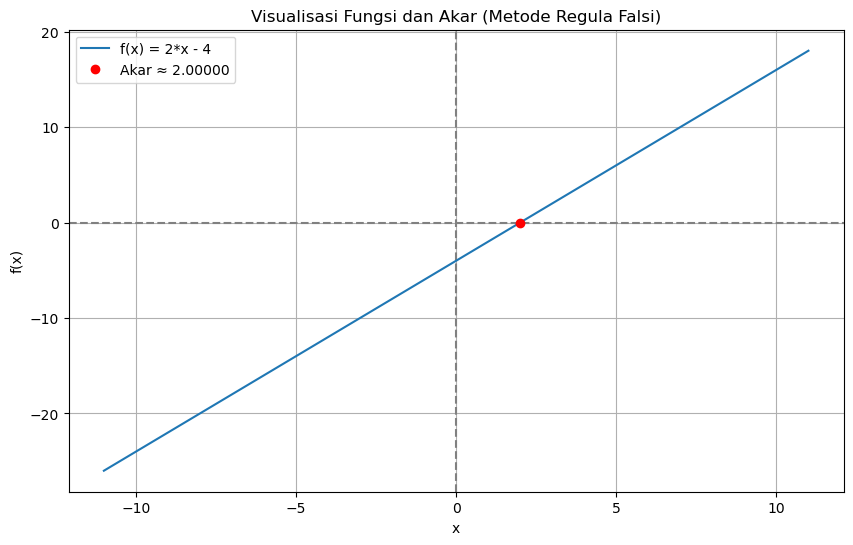

In [46]:
akar = regula_falsi(fungsi_expr, a, b)

if akar is not None:
    plot_function(fungsi_expr, root=akar, x_range=(a - 1, b + 1))
